# 데이터 분석을 위한 전처리와 시각화 with 파이썬

# 8장. 환경 관련 데이터 분석

## 학습 목표

* 환경 관련 데이터 분석을 위한 분석 대상 데이터를 수집한다.
* 수집한 데이터를 목적에 따라 가공한다.
* 데이터를 분석하고 시각화하여 분석 결과를 해석한다.

## 1. 분석 대상 데이터 수집

* 미세먼지 자료를 분석 대상 데이터로 정하여 수집하고 가공
* 미세먼지에 대해 변화 추이를 파악하고 농도에 영향을 미치는 주요 변수를 분석

### 1.1 에어코리아 사이트에서 미세먼지 데이터 수집

* 에어코리아( https://www.airkorea.or.kr/index )에 접속
* 메뉴에서 '통계정보' → '최종확정 측정자료 조회' → '확정자료 다운로드' 클릭
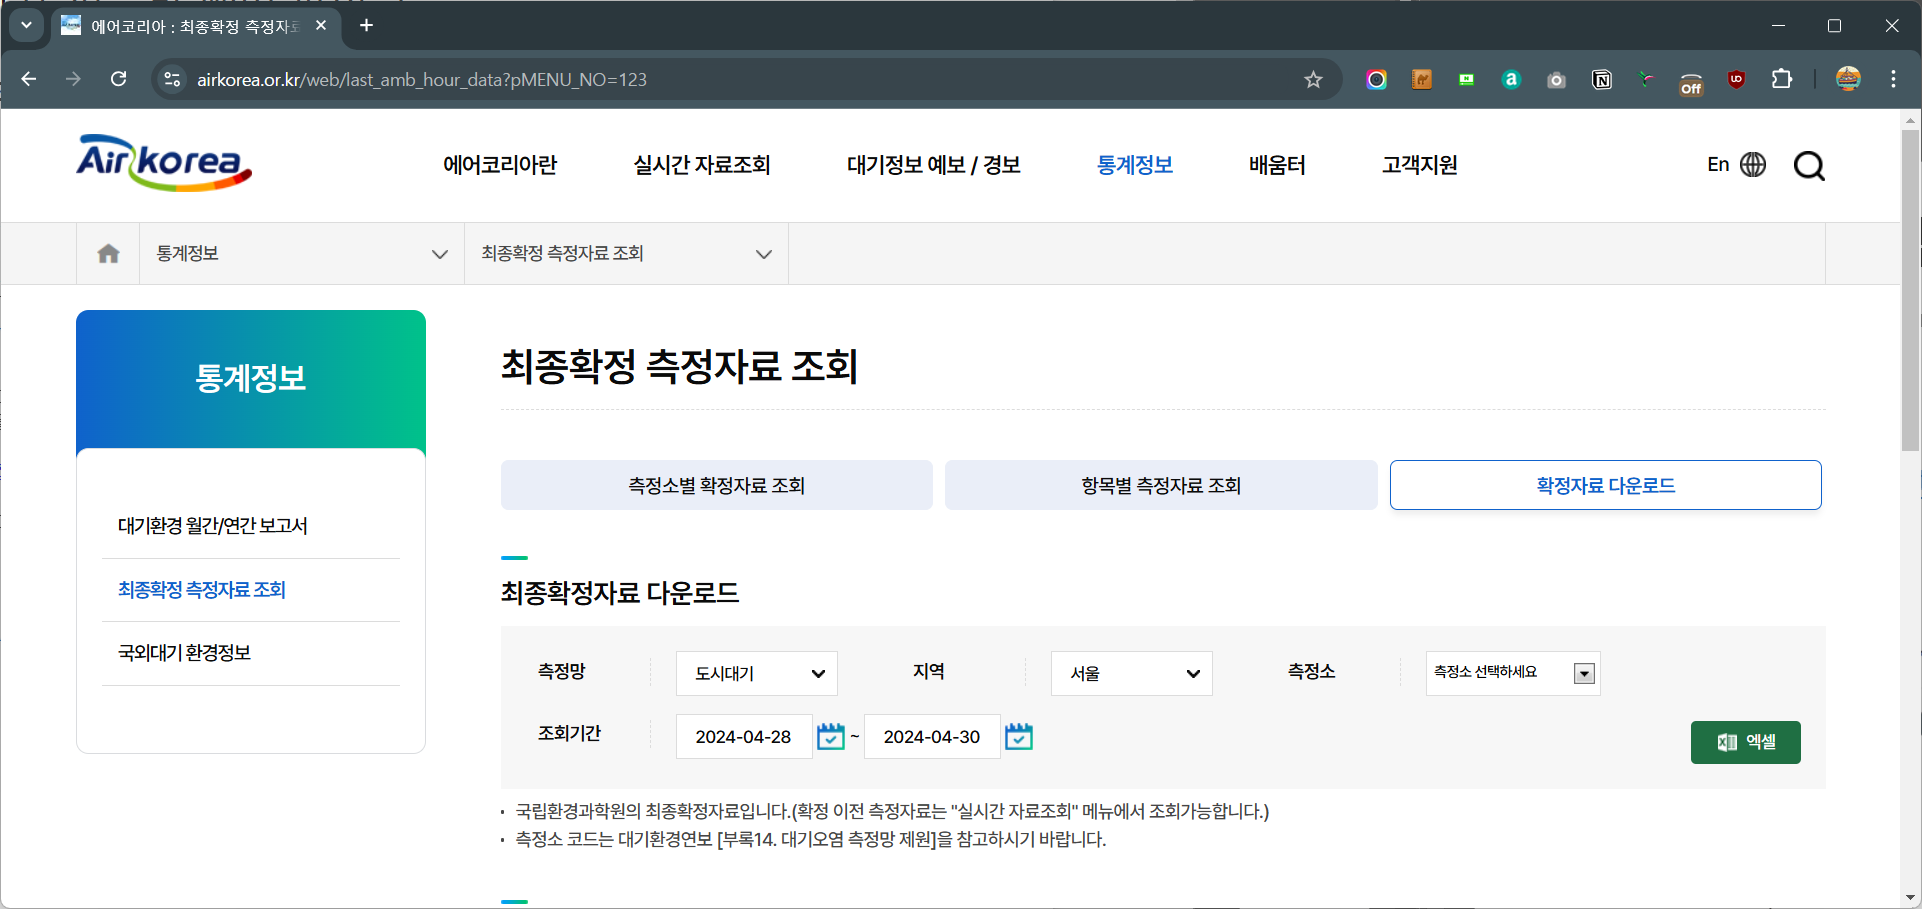

* 조회 기간과 측정소를 지정하고 [엑셀] 버튼을 클릭하여 파일 다운로드
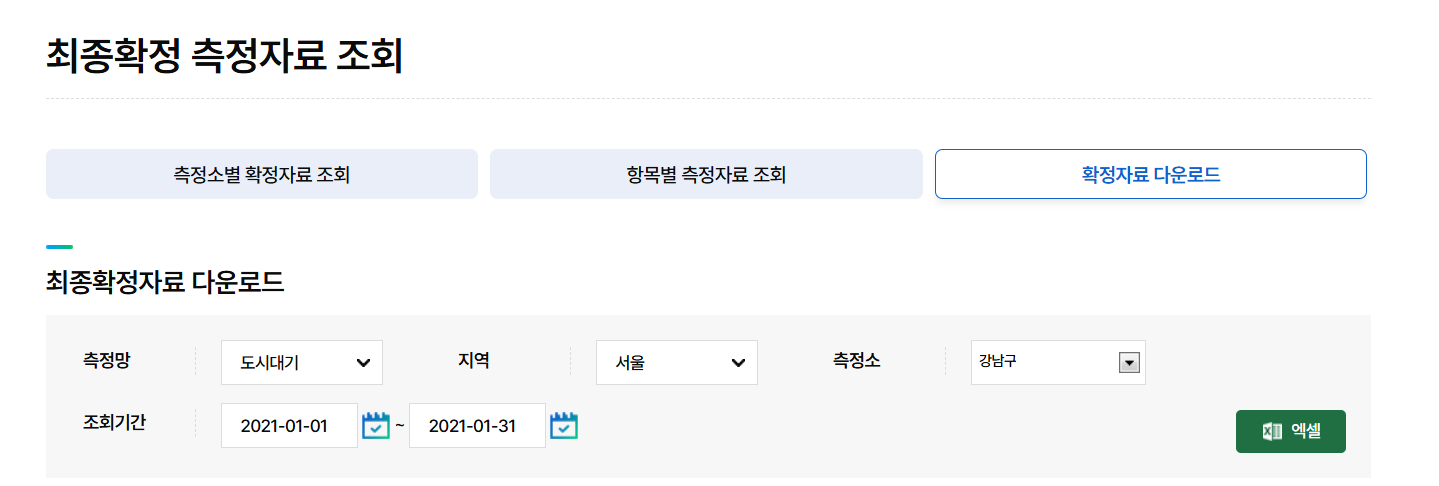

* 엑셀에서 다운로드 파일을 열어서 데이터 분석에 필요없는 칼럼(B~D) 삭제
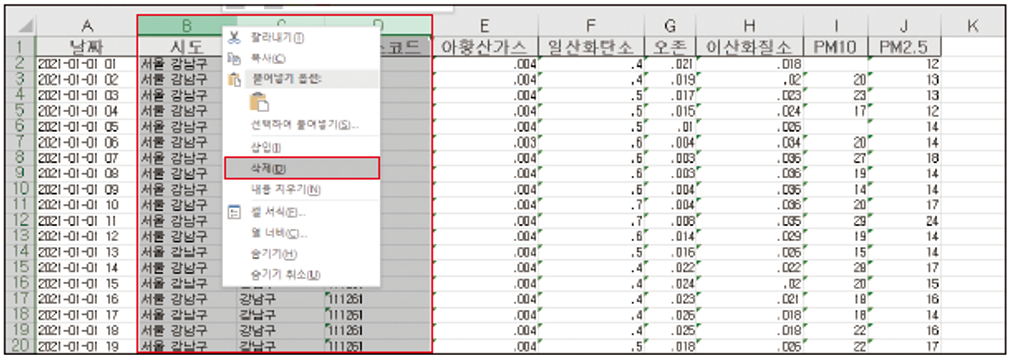

* 파일 형식을 'Excel 통합 문서(*.xlsx)'로 변경하고 파일명을 'dust.xlsx'로 저장
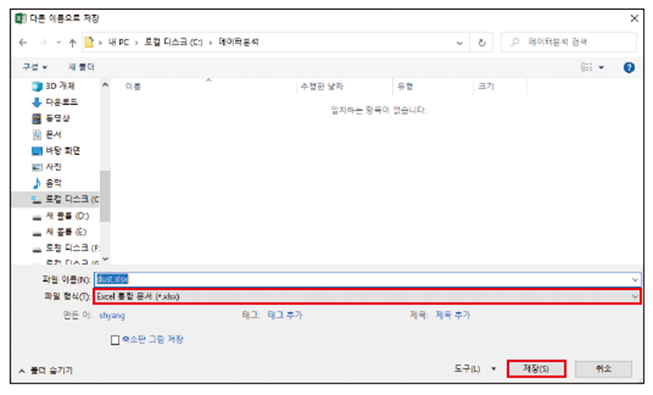

### [미세먼지 데이터 정보 파일(dust.xlsx) 설명]
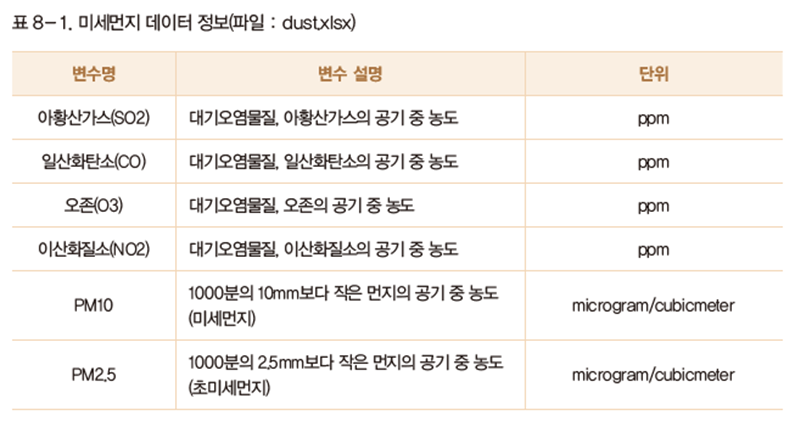

### 1.2 기상청 사이트에서 날씨 데이터 수집

* 기상청( https://data.kma.go.kr/cmmn/main.do )에 접속
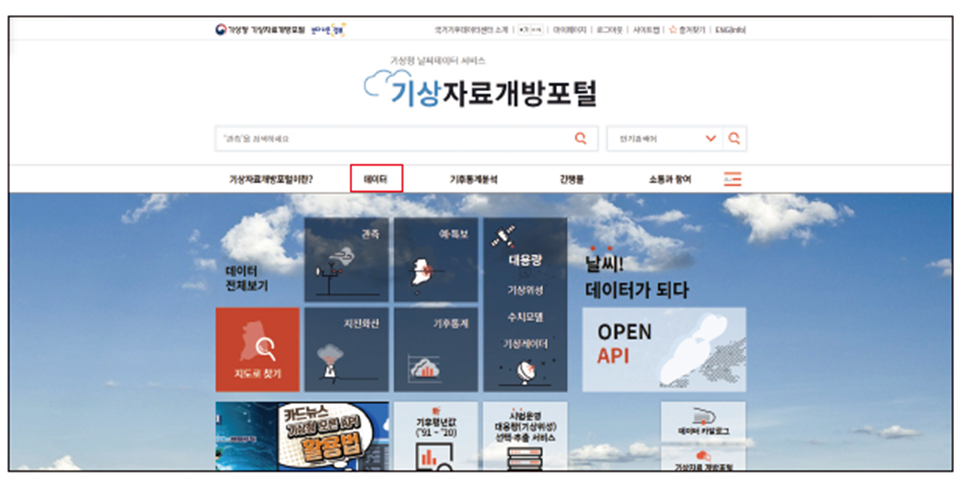

* 왼쪽 메뉴에서 '기상관측' → '지상' → '방재기상관측(AWS)' 선택
* 자료 화면에서 지점을 선택하고 데이터 분석에 필요한 자료를 선택
* [조회] 버튼을 클릭 후 [Excel] 버튼을 클릭하여 파일 다운로드
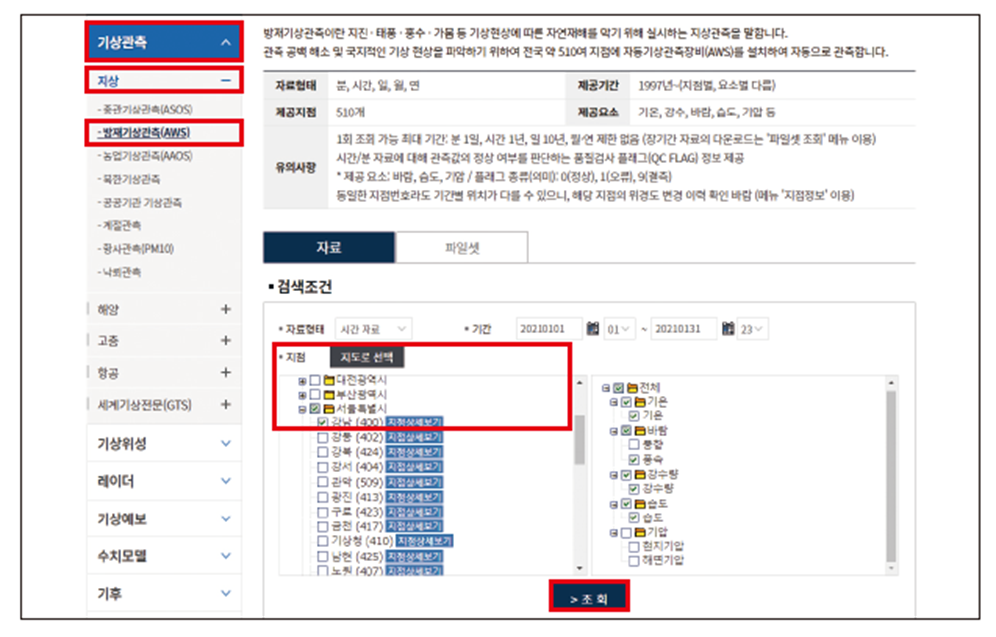

* 엑셀을 열어 다운로드 파일의 내용을 확인
* 파일 형식을 'Excel 통합 문서(*.xlsx)'로 변경하고 파일명을 'weather.xlsx'로 저장
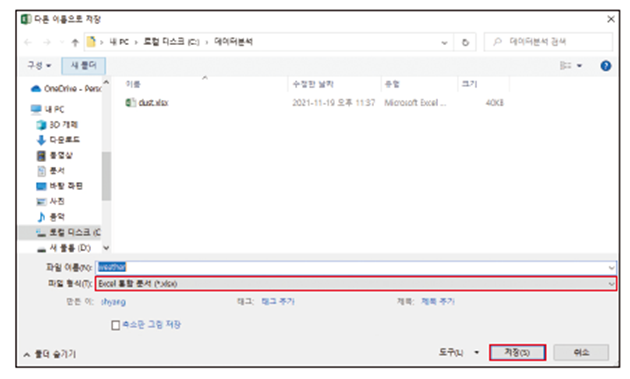

### [날씨 정보에 관한 데이터 파일(weather.xlsx) 설명]
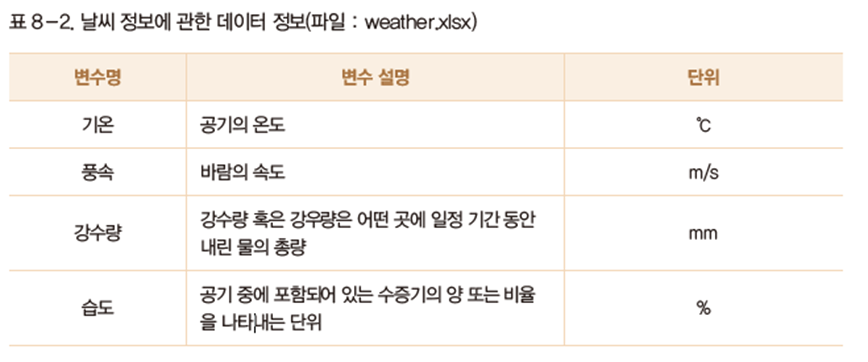

## 2. 데이터 확인

* 미세 데이터(dust.xlsx)와 날씨 데이터(weather.xlsx)를 불러와서 데이터 전체적인 구조와 기초 통계량 등을 확인
* 데이터를 가공하고 데이터 결측치 처리

### 2.1 미세먼지 데이터

### [데이터 읽어서 확인하기]

#### 실습 코드 8-1. '미세먼지' 엑셀 파일 읽어오기
* pd.read_excel() 함수를 이용하여 데이터를 읽어와서 데이터프레임 변수에 저장
* df.head() 함수로 처음 5행 확인

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# dust.xlsx 불러오기
file_path='./dust.xlsx'
dust=pd.read_excel(file_path)
dust.head()

#### 실습 코드 8-2. 데이터의 기본 정보 출력하기

* df.info() 함수를 사용하여 데이터프레임의 전반적인 정보 확인

In [ ]:
dust.info()

#### 실습 코드 8-3. 데이터의 기초 통계량 출력

* df.describe() 함수를 사용하여 데이터 기초 통계량 확인

In [ ]:
dust.describe()

### [데이터 가공하기]

#### 실습 코드 8-4. 한글 컬럼명을 영문명으로 변경

* df.rename() 함수를 사용하여 한글 컬럼명을 영문으로 변경

In [ ]:
# 컬럼의 이름을 영문으로 변경한다.
dust.rename(columns={'날짜':'date','아황산가스':'so2',
                     '일산화탄소':'co','오존':'o3',
                     '이산화질소':'no2'},inplace=True)
dust.head()

#### 실습 코드 8-5. 특정 문자열 추출

* 날짜 데이터에서 년도-월-일만 추출한다.
  - date 열의 텍스트 중 처음부터 10번째 문자까지만 추출

In [ ]:
dust['date']=dust['date'].str[:11]
dust.head()

### 실습 코드 8-6. 데이터형 변경

* pd.to_datetime() 함수를 사용하여 문자로 저장된 날짜를 날짜 자료형으로 변환

In [ ]:
dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

#### 실습 코드 8-7. 새로운 컬럼 생성

* 날짜 자료형의 속성을 이용하여 year, month, day 컬럼 생성
  - dt.year → dust['year']
  - dt.month → dust['month']
  - dt.day → dust['day']

In [ ]:
dust['date']

In [ ]:
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day
dust.columns

#### 실습 코드 8-8. 컬럼 순서 재정렬

* 데이터프레임 dust의 컬럼(열) 이름의 순서를 다시 지정함으로써 컬럼 순서 재정렬

In [ ]:
dust=dust[['date','year','month','day','so2','co','o3','no2','PM10','PM2.5']]
dust.columns

### [데이터 전처리]

#### 실습 코드 8-9. 결측치 확인하기

In [ ]:
dust.isnull().sum()

#### 실습 코드 8-10. 결측치 처리 : 이전 데이터로 채우기
* **df.ffill()** : NaN이 있는 행의 직전 행에 있는 값으로 대체
* **df.bfill()** : NaN이 있는 행의 직후 행에 있는 값으로 대체

In [ ]:
dust = dust.ffill()
dust.head()

#### 실습 코드 8-11. 결측치 처리 : 이전 값이 없는 경우 특정 값으로 채우기

* df.fillna() 함수를 이용하여 남아 있는 NaN 값을 모두 20으로 변경

In [ ]:
dust.fillna(20, inplace = True)
dust.head()

#### 실습 코드 8-12. 결측치 확인

In [ ]:
dust.isnull().sum()

### 2.2 날씨 데이터

### [데이터 읽어와서 확인하기]

#### 실습 코드 8-13. '날씨데이터' 엑셀 파일 읽어오기
* pd.read_excel() 함수를 이용하여 데이터를 읽어와서 데이터프레임 변수에 저장
* df.head() 함수로 처음 5행 확인

In [ ]:
file_path='./weather.xlsx'
weather=pd.read_excel(file_path)
weather.head()

#### 실습 코드 8-14. 데이터의 기본 정보 출력
* df.info() 함수를 사용하여 데이터프레임의 전반적인 정보 확인

In [ ]:
weather.info()

### [데이터 가공하기]

#### 실습 코드 8-15. 컬럼 삭제 : 지점, 지점명 삭제
* df.drop() 함수를 이용하여 열 이름이 '지점', '지점명'으로 되어 있는 열 삭제 (inplace = True로 설정해서 삭제한 내용을 weather 데이터프레임에 바로 적용)

In [ ]:
weather.drop('지점',axis=1,inplace=True)
weather.drop('지점명',axis=1,inplace=True)
weather.head()

#### 실습 코드 8-16. 컬럼명 변경 : columns 사용
* 단위와 특수기호가 들어간 컬럼(열) 이름을 변경

In [ ]:
weather.columns=['date','temp','wind','rain','humid']
weather.head()

In [ ]:
weather.columns

#### 실습 코드 8-17. 날짜 컬럼 시간 데이터 제거 : date
* date 열에 저장되어 있는 정보(연도-월-일 시:분:초)를 dt.date 값으로 대체하여 '연도-월-일'로 변경
* df.astype() 함수를 사용하여 date 열의 타입을 문자열 타입에서 datetime64[ns] 타입으로 변경

In [ ]:
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather['date'] = weather['date'].astype('datetime64[ns]')
weather.info()

In [ ]:
weather.head()

#### 실습 코드 8-18. 데이터 변경
* 기상청에서 0.1 단위로 강수량을 측정해서 0.1 이하로 비가 내리면 0으로 표시
  - df.replace() 함수를 사용해서 강수량(rain)이 0인 데이터를 0.01로 변경
* df.value_counts() 함수를 사용해서 강수량(rain)별로 발생한 횟수를 출력

In [ ]:
# 강수량이 0인 값을 0.01로 변환
weather['rain']=weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

## 3. 데이터 병합
* 미세먼지 데이터와 날씨 데이터를 가로로 병합 (필요없는 행을 삭제하고 병합)

#### 실습 코드 8-19. 미세먼지 데이터 행, 열 크기 확인

In [ ]:
dust.shape

#### 실습 코드 8-20. 날씨 데이터 행, 열 크기 확인

In [ ]:
weather.shape

#### 실습 코드 8-21. 미세먼지 데이터 특정 행 삭제

* dust 데이터프레임의 마지막에 2021년 01월 31일 24시 데이터가 있으나 weather 데이터프레임의 마지막은 2021년 01월 31일 23시까지의 데이터만 있음
* df.drop() 함수를 사용하여 dust 데이터프레임의 마지막(744번째) 행 삭제

In [ ]:
dust.drop(index = 743, inplace = True)

In [ ]:
dust.shape

#### 실습 코드 8-22. 미세먼지 데이터와 날씨 데이터 병합
* pd.merge() 함수를 사용하여 dust와 weather 데이터프레임이 동일하게 가진 date 열을 기준으로 병합(내부 조인)해서 df 변수에 할당

In [ ]:
df=pd.merge(dust,weather,on='date')
df.head()

## 4. 데이터 분석 및 시각화

* 병합한 데이터에서 특정 요소 간의 상관관계를 분석하고 시각화하여 분석 결과를 확인

### 4.1 데이터 분석

#### 실습 코드 8-23. 모든 요소별 상관관계 확인

* df.corr() 함수를 하용하여 미세먼지 데이터와 날씨 데이터의 모든 요소별 상관관계 확인

In [ ]:
df.corr()

#### 실습 코드 8-24. 미세먼지와 다른 요소와의 상관관계

* 미세먼지(PM10)를 기준으로 각 변수와의 상관관계 확인

In [ ]:
corr=df.corr()
corr
# 상관관계(corr) 정보 중 'PM10' 열의 데이터만 내림차순(ascending = False)로 정렬하여 출력
corr['PM10'].sort_values(ascending=False)

### 4.2 데이터 시각화

### [히스토그램 그래프로 시각화]

#### 실습 코드 8-25. 히스토그램 그래프로 시각화

* df.hist() 함수를 이용하여 히스토그램 그래프 출력

In [ ]:
# figsize 속성으로 가로 20인치, 세로 15인치 그래프 영역 생성
# bins 값을 50으로 설정하여 히스토그램 구간 경계값을 50개로 설정
df.hist(bins=50,figsize=(20,15))

### [막대 그래프로 시각화]

#### 실습 코드 8-26. 막대 그래프로 시각화
* 일별 미세먼지 현황을 막대 그래프로 출력

In [ ]:
# 막대 그래프로 시각화 : 일별 미세먼지 평균현황
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
# df 데이터프레임의 열 중 'day' 열을 x축, 'PM10' 열을 y축에 설정하여 일별 미세먼지 현황을 막대그래프로 출력
dayGraph=sns.barplot(x='day',y='PM10',data=df, palette = "Set3")
plt.xticks(rotation=0)
plt.show()

### [히트맵 그래프로 시각화]

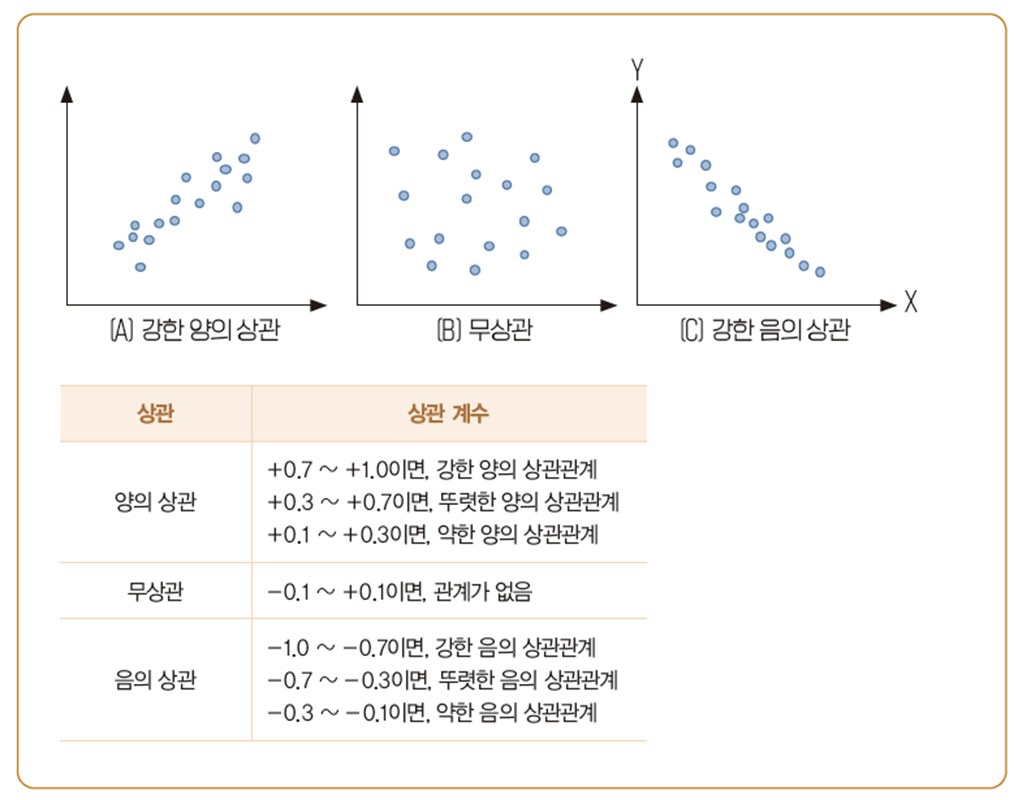

#### 실습 코드 8-27. 히트맵 그래프로 시각화

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, fmt='.2f',cmap='hot')

### [산점도 그래프로 시각화 (1)]

#### 실습 코드 8-28. 산점도 그래프로 시각화 (1)

In [ ]:
# 산점도 그래프로 시각화1 : 온도와 미세먼지 상관관계
plt.figure(figsize=(15,10))
x=df['temp'] #온도
y=df['PM10'] #미세먼지
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()

### [산점도 그래프로 시각화 (2)]

#### 실습 코드 8-29. 산점도 그래프로 시각화 (2)

In [ ]:
# 산점도 그래프로 시각화2 : # 미세먼지와 초미세먼지의 상관관계
# 산점도로 미세먼지와 초미세먼지가 선형성을 가짐을 확인할 수 있다.

plt.figure(figsize=(15,10))
x=df['PM10'] #미세먼지
y=df['PM2.5']#초미세먼지
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()

### [분석 요약]

* 미세먼지(pm10)와 초미세먼지(pm2.5)는 강한 관계성이 있다.
* 미세먼지 변수 중 대기오염 관련된 변수들은 관련성이 있다.
* 일산화탄소(co)와 이산화질소(no2)는 강한 관계성이 있다.
* 오존(o3)과 바람(wind)는 약한 관계성이 있다.
* 기온(temp)과 미세먼지는 무관하다.